In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(url)

In [3]:
print("Первые 5 строк датасета:")
df.head()

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
print("Информация о датасете (столбцы, типы, пропуски):")
df.info()

Информация о датасете (столбцы, типы, пропуски):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
print("Описательные статистики:")
df.describe()

Описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [6]:
# Доля пропусков в процентах
missing_ratio = df.isna().mean() * 100
print("Доля пропусков в процентах: ")
print(missing_ratio)

Доля пропусков в процентах: 
user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64


In [7]:
duplicates_count = df.duplicated().sum()
print(f"Количество дублирующих строк: {duplicates_count}")

Количество дублирующих строк: 1


In [8]:
# Нереалистичные значения возраста(если ноль лет или больше 100), пометим покупателей, которым меньше 10 лет как подозрительных
unrealistic_age = df[(df['age'] < 0) | (df['age'] > 100)]
young_age = df[df['age'] < 10]
print("Нереалистичный возраст:")
print(unrealistic_age)
print("Возраст меньше 10 (подозрительно для покупок):")
print(young_age)

Нереалистичный возраст:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Возраст меньше 10 (подозрительно для покупок):
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488


In [9]:
# Логические противоречия: покупки есть, а дохода нет, откуда деньги
zero_revenue_positive_purchases = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print("Покупки есть, денег нет")
print(zero_revenue_positive_purchases)

Покупки есть, денег нет
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [10]:
# Отрицательные покупки
negative_purchases = df[df['purchases'] < 0]
print("Отрицательные покупки:")
print(negative_purchases)

Отрицательные покупки:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


В датасете есть проблемы с качеством данных. Во-первых, был найден один полный дубликат(стоило бы его убрать), во-вторых, был найден пропуск в столбце age, говоря об аномальных случаях: найдены покупатели возрастом 5 лет и 120 лет, скорее всего это ошибка. Также были найдены логические противоречия: есть случай с положительным количеством покупок (4), но нулевым доходом (user_id 11). Есть отрицательная покупка, скорее всего это ошибка(хотя может быть это помечалось как возврат? потому и -1)   

In [11]:
# 1. Частоты для категориальных переменных
print("Частоты по странам")
country_freq = df['country'].value_counts()
print(country_freq)

print("Процентное распределение по странам")
country_pct = df['country'].value_counts(normalize=True) * 100
print(country_pct.round(2))

Частоты по странам
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
Процентное распределение по странам
country
RU    31.71
FR    29.27
US    19.51
DE    14.63
CN     4.88
Name: proportion, dtype: float64


In [12]:
# 2. Осмысленная группировка с агрегатами
print("Средние и суммарные показатели по странам")
agg_by_country = df.groupby('country').agg({
    'purchases': ['count', 'mean', 'sum'],
    'revenue': ['mean', 'sum', 'median'],
    'age': 'mean'
}).round(2)
# Переименуем столбцы для красоты
agg_by_country.columns = ['Кол-во_польз', 'Среднее_покупок', 'Всего_покупок',
                          'Средний_доход', 'Общий_доход', 'Медианный_доход', 'Средний_возраст']
agg_by_country = agg_by_country.sort_values('Общий_доход', ascending=False)
print(agg_by_country)

Средние и суммарные показатели по странам
         Кол-во_польз  Среднее_покупок  Всего_покупок  Средний_доход  \
country                                                                
RU                 13             4.77             62         790.08   
DE                  6             6.50             39        1445.50   
FR                 12             4.25             51         675.92   
US                  8             4.62             37         557.38   
CN                  2             4.50              9        1054.00   

         Общий_доход  Медианный_доход  Средний_возраст  
country                                                 
RU             10271            650.0            30.08  
DE              8673           1200.0            34.60  
FR              8111            619.5            46.25  
US              4459            537.5            36.71  
CN              2108           1054.0            24.00  


In [13]:
print("Топ-10 пользователей по доходу")
top_users = df.nlargest(10, 'revenue')[['user_id', 'country', 'age', 'purchases', 'revenue']]
print(top_users)

Топ-10 пользователей по доходу
    user_id country   age  purchases  revenue
23       24      DE  32.0         11     2475
13       14      DE  36.0          9     2358
39       40      RU  34.0          7     2086
11       12      CN  20.0          7     1652
16       17      FR  32.0          6     1608
20       21      RU   5.0          8     1488
28       29      FR  47.0          6     1440
26       27      RU  54.0          6     1302
4         5      DE   NaN          6     1296
38       39      FR  39.0          7     1162


In [14]:
# Создаём возрастные группы
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

print("Распределение по возрастным группам")
print(df['age_group'].value_counts().sort_index())

# Средние показатели по возрастным группам
age_analysis = df.groupby('age_group', observed=True).agg({
    'purchases': 'mean',
    'revenue': ['mean', 'sum'],
    'user_id': 'count'
}).round(2)
age_analysis.columns = ['Среднее_покупок', 'Средний_доход', 'Общий_доход', 'Кол-во_польз']
print("\nПоказатели по возрастным группам:")
print(age_analysis)

Распределение по возрастным группам
age_group
<18       2
18-24    10
25-34    11
35-49     9
50-64     6
65+       0
Name: count, dtype: int64

Показатели по возрастным группам:
           Среднее_покупок  Средний_доход  Общий_доход  Кол-во_польз
age_group                                                           
<18                   6.00        1296.00         2592             2
18-24                 5.00         581.60         5816            10
25-34                 4.91         946.82        10415            11
35-49                 4.22         945.33         8508             9
50-64                 5.00         596.67         3580             6


Покупателей из России(13) и Франции(12) больше всего, основная доля дохода приходится на Россию и Германию. Группа младше 18 лет малочисленна (2 человека), но имеет аномально высокий средний чек (1296), это вызывает вопрос, достоверны ли данные. По возрасту наиболее ценный сегмент - 25–34 года

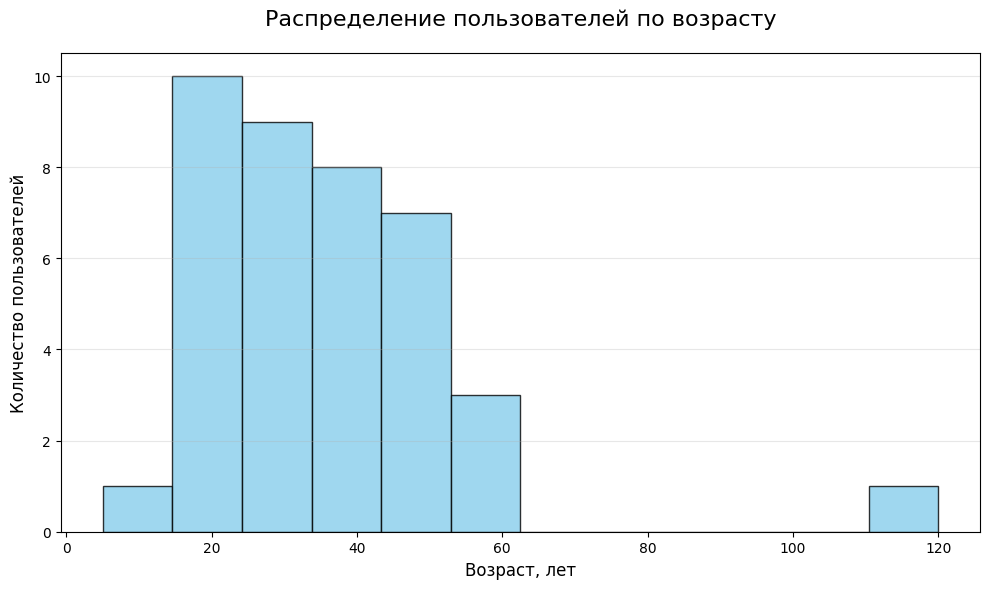

Вывод: Основная масса пользователей — 25–45 лет. Есть несколько выбросов: 5 лет и 120 лет (аномалии).


In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=12, edgecolor='black', color='skyblue', alpha=0.8)

plt.title('Распределение пользователей по возрасту', fontsize=16, pad=20)
plt.xlabel('Возраст, лет', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(
    r"C:\Users\Lushi\test\injeneriaAI\homeworks\HW02\figures\histogram.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# Комментарий:
print("Вывод: Основная масса пользователей — 25–45 лет. Есть несколько выбросов: 5 лет и 120 лет (аномалии).")

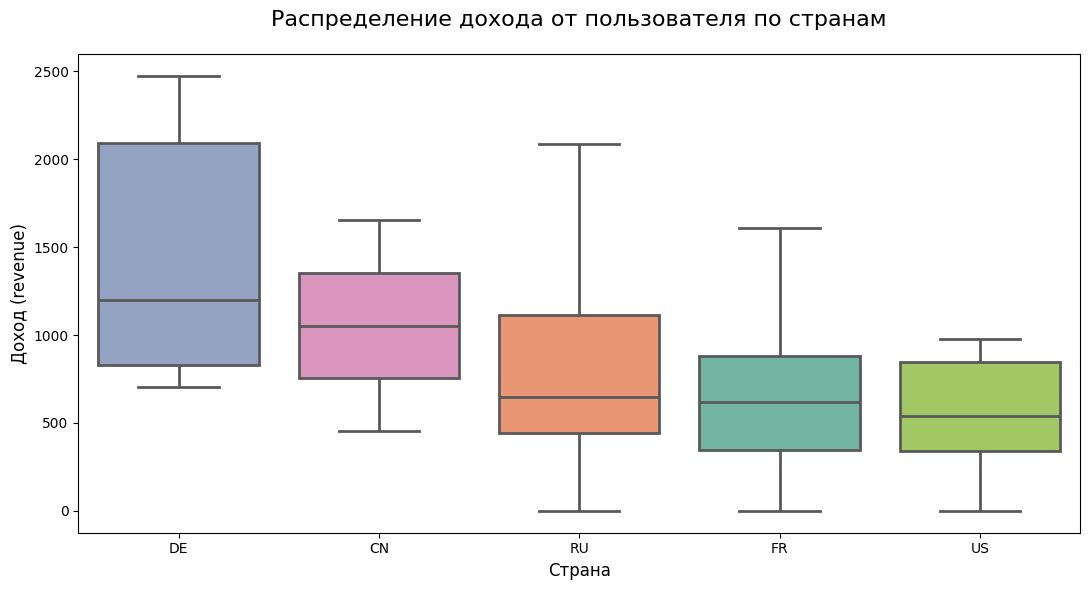

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(11, 6))


df_sorted = df.sort_values('revenue', ascending=False)


sns.boxplot(
    x='country',
    y='revenue',
    hue='country',             
    data=df,
    order=df.groupby('country')['revenue'].median().sort_values(ascending=False).index,
    palette='Set2',
    linewidth=2,
    dodge=False,               
    legend=False               
)

plt.title('Распределение дохода от пользователя по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)

plt.tight_layout()
plt.savefig(
    r"C:\Users\Lushi\test\injeneriaAI\homeworks\HW02\figures\boxplot_revenue_by_country1.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

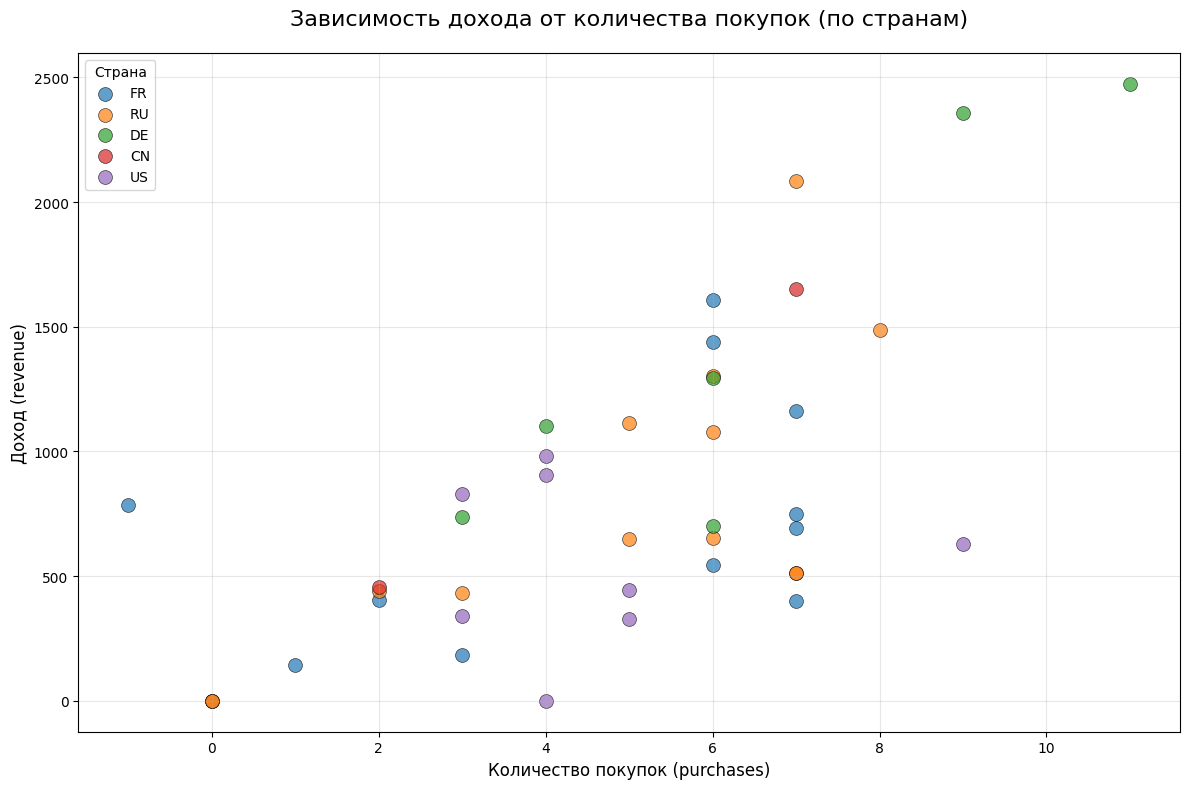

In [19]:
plt.figure(figsize=(12, 8))

countries = df['country'].unique()
colors = plt.cm.tab10.colors

for i, country in enumerate(countries):
    data = df[df['country'] == country]
    plt.scatter(data['purchases'], data['revenue'], 
                label=country, s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.title('Зависимость дохода от количества покупок (по странам)', fontsize=16, pad=20)
plt.xlabel('Количество покупок (purchases)', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.savefig(
    r"C:\Users\Lushi\test\injeneriaAI\homeworks\HW02\figures\scatter_purchases_vs_revenue.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()